# Notebook for Exercise 9: Langevin Simulation

Import numpy and matplotlib:

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Define simulation parameters:

In [2]:
N= 100000  # Number of integration steps
k= 0.5     # force constant
m= 1.0     # mass of the particle
dt= 0.5    # integration time step

# We use reduced units and set kT = 1
kT_target= 1.0  # Temperature

friction= 5

Initialize arrays for positions and velocities:

In [14]:
x= np.zeros(N)   # array for x-coordinates initialized with zeros
v= np.zeros(N)   # array for velocities           "         "

Starting conditions (change as indicated in the exercise):

In [15]:
# Initial condition
x[0]= -5.0
v[0]= 0.0
F= 0.0

Define time axis:

In [16]:
# time t at integration step i is t[i]
t= np.arange(N) * dt

Implementation of Langevin Velocity Verlet Integrator

*(from Bussi and Parrinello. Phys. Rev. E 75, 056707 (2007))*

In [17]:
# (np.random.randn() generates a Gaussian distributed random number with a standard deviation of 1)

h= dt / 2.0  # half time step

c1= np.exp(-0.25*friction*h)
c2= np.sqrt( (1-c1*c1) * kT_target * m )

for i in range(0,N-1):
    v[i+1]= c1 * v[i] + c2 * np.random.randn()
    v[i+1]+= 0.5 * F * h

    x[i+1]= x[i] + v[i+1] * h

    # F = 0            # free diffusion: no external force
    
    # replace this with the force F(x) = -dU/dx in the 
    # double-well potential U(x)= 0.002 * (x-5)^2 * ((x+5)^2 + 2)
    F = -0.002 * (4.0 * (x[i])**3 - 96.0*x[i] - 20.0)

    v[i+1]+= 0.5 * F * h
    v[i+1]= c1 * v[i+1] + c2 * np.random.randn()

Here you can implement your analysis:

T/(kT)=  1.021492902090003


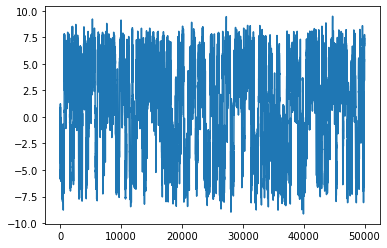

In [18]:
# x contains the positions
# v contains the velocities

# e.g.: Temperature
print("T/(kT)= ", np.mean(0.5*m*v**2 * 2.0))

plt.plot(t, x, '-')
plt.show()

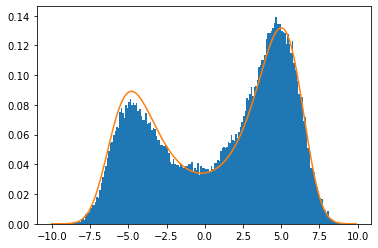

In [21]:
dx = 0.1
xbins = np.arange(-10,10,dx);

plt.hist(x, bins=xbins, density=True);

U = 0.002 * (xbins-5)**2 * ((xbins+5)**2 + 2)

plt.plot(xbins, np.exp(-U)/(sum(np.exp(-U)))/dx)

In [22]:
count = 0
time_to_pos = np.array([])
time_to_neg = np.array([])

number_A = 0;
number_B = 0;

for i in range(1,N):
    
    if (x[i]<0):
        number_A += 1;
    if (x[i]>0):
        number_B += 1;
        
    if (x[i]>0) and (x[i-1]<0):
        time_to_pos =  np.append(time_to_pos, count)
        count = 0;

    if (x[i]<0) and (x[i-1]>0):
        time_to_neg =  np.append(time_to_neg, count)
        count = 0;
        
    count += 1;

mean_time_to_pos = np.mean(time_to_pos);
mean_time_to_neg = np.mean(time_to_neg);

print(mean_time_to_pos)
print(mean_time_to_neg)

print(1./mean_time_to_pos)
print(1./mean_time_to_neg)

print("k1/k2 = ",mean_time_to_pos/mean_time_to_neg)
print("pA/pB = ", number_A/number_B)



103.57712765957447
162.46666666666667
0.009654641160611118
0.006155108740254411
k1/k2 =  0.6375284837478937
pA/pB =  0.6378779441150457
